**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 1

**Datos de la entrega:** Lunes 25 de setiembre 2023, a más tardar a las 11:59 pm

**Estudiantes:**
- Daniel Araya Sambucci 
- Esteban Leiva Montenegro 2020426227






# Parte 1.  Series temporales y graficación  (65 puntos)

1. Se adjuntan un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie los capítulos en el PDF, se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo la serie temporal en el archivo: TS_d_1, realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.
1. Considere que el código ejemplo en el PDF podría requerir algún pequeño cambio por un tema de versiones de la biblioteca en el tiempo.


In [156]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from datetime import datetime
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# pip install  scikit-learn
# pip install statsmodels


### 1.1
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [157]:
"""The documetation indicates the use of Series.from_csv() to load files has been deprecated
use pandas.read_csv() instead. https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.from_csv.html
"""
series = pd.read_csv('TS_d_1.csv',
                     header=0 , #Specify the header information at row 0
                     parse_dates=[0],  #In first column contains dates that need to be parsed
                     index_col=0) #Index information for the time
print(series.head()) #For default shows first five rows
print(type(series)) #Shows series type

          temperatura
fecha                
1/1/2004          5.3
2/1/2004          5.6
3/1/2004          5.9
4/1/2004          6.2
5/1/2004          8.4
<class 'pandas.core.frame.DataFrame'>


### 1.2
- Muestra el promedio, la mediana y la desviación estándar de los datos

In [158]:
#We can use series.describe() to get stadistics summary or do separately
print('Mean: ',series['temperatura'].mean())
print('Median: ', series['temperatura'].median())
print('Standard deviation: ', series['temperatura'].std())


Mean:  8.013887134133503
Median:  7.4
Standard deviation:  3.8639481208695945


### 1.3
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, luego el promedio para todos los febreros, y así sucevivamente.

In [159]:

dataframe = pd.DataFrame() #New dataframe to make another table with other columns
dataframe['month'] = [ datetime.strptime(series.index[i],"%d/%m/%Y").month for i in range(len(series))] #Assing month to dataframe
dataframe['temperature'] = [series['temperatura'].iloc[i] for i in range(len(series))]  #Assing temperature to new dataframe
print(dataframe.groupby('month')['temperature'].mean()) #Group for month data and get mean



month
1     7.688139
2     7.735815
3     7.874268
4     8.524821
5     8.221762
6     7.273333
7     7.706328
8     8.226898
9     8.821692
10    8.498586
11    7.806769
12    7.776055
Name: temperature, dtype: float64


### 1.4 
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=5

In [160]:
temps =pd.DataFrame(series.values) #Created a new dataframe with de same values
lag: int  = 5 #lag value 
dataframe = pd.concat([temps.shift(i) for i in range(lag,0 , -1)], axis=1)#uses generical for to create a shifting values  
dataframe.columns = [f"t-{i}" for i in range(lag)] #uses to create the generical columns
print(dataframe.head(20)) #This is for show result

    t-0   t-1    t-2    t-3    t-4
0   NaN   NaN    NaN    NaN    NaN
1   NaN   NaN    NaN    NaN   5.30
2   NaN   NaN    NaN   5.30   5.60
3   NaN   NaN   5.30   5.60   5.90
4   NaN   5.3   5.60   5.90   6.20
5   5.3   5.6   5.90   6.20   8.40
6   5.6   5.9   6.20   8.40   7.90
7   5.9   6.2   8.40   7.90   7.60
8   6.2   8.4   7.90   7.60   7.70
9   8.4   7.9   7.60   7.70   7.10
10  7.9   7.6   7.70   7.10   6.80
11  7.6   7.7   7.10   6.80   5.70
12  7.7   7.1   6.80   5.70   6.20
13  7.1   6.8   5.70   6.20   6.50
14  6.8   5.7   6.20   6.50   5.90
15  5.7   6.2   6.50   5.90   8.70
16  6.2   6.5   5.90   8.70  12.80
17  6.5   5.9   8.70  12.80   5.13
18  5.9   8.7  12.80   5.13   5.14
19  8.7  12.8   5.13   5.14   5.16


### 1.5
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 3. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [161]:

temps = pd.DataFrame(series.values)# Create a DataFrame from series values
width: int = 3# Set the width of the rolling window
shifted = temps.shift(width-1 )# Shift the data by (width - 1) time steps
window = shifted.rolling(window=width)# Apply a rolling window with the specified width
# Concatenate minimum, mean, maximum, and original values into a new DataFrame
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
# Set column names
dataframe.columns = ['min', 'mean', 'max', 't+1']
# Print the first 5 rows of the resulting DataFrame
print(dataframe.head(10))





   min      mean  max  t+1
0  NaN       NaN  NaN  5.3
1  NaN       NaN  NaN  5.6
2  NaN       NaN  NaN  5.9
3  NaN       NaN  NaN  6.2
4  5.3  5.600000  5.9  8.4
5  5.6  5.900000  6.2  7.9
6  5.9  6.833333  8.4  7.6
7  6.2  7.500000  8.4  7.7
8  7.6  7.966667  8.4  7.1
9  7.6  7.733333  7.9  6.8


### 1.6
- A la variable series, aplíquele la instrucción series.plot(). 
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

"\nIt's looks like stationary time series because have no trends but to do\nthat conclusion we need to do more and aproppiate stadistics test.\n"

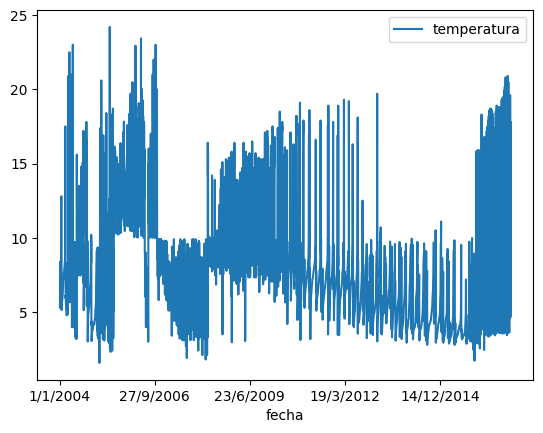

In [162]:
series.plot()
"""
It's looks like stationary time series because have no trends but to do
that conclusion we need to do more and aproppiate stadistics test.
"""

### 1.7

- Agrupe los datos y muestre un gráfico similar al de la seccion 6.4 de las lecturas (Stacked lines plots).  
- ¿Puede hacer algún comentario del comportamiento anual de los datos?

<Figure size 1000x600 with 0 Axes>

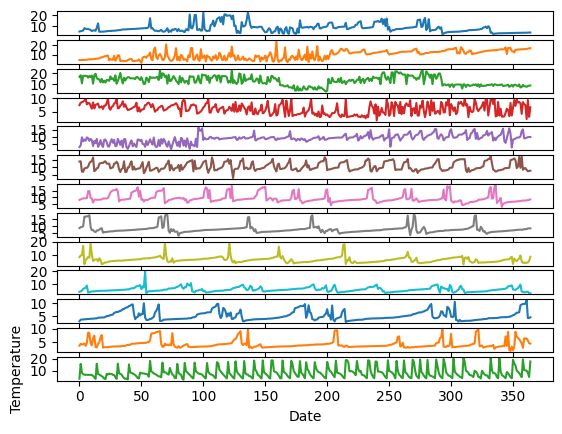

"\nEach year exhibits distinct patterns of behavior. \nIn the initial years, the behavior tends to be variable and prone to fluctuations, in contrast to the more recent years.\nFollowing the year 2010, there has been a trend of relatively stable temperatures. \nHowever, it's noteworthy that in the most recent year, 2016, \nthere appears to be a resurgence of temperature variability once again.\n"

In [163]:
def parser(x):
    return datetime.strptime(x, '%d/%m/%Y').year #Function to parse the date
dataframe = pd.DataFrame() #New dataframe to make another table with other columns
years = pd.DataFrame() #To save the years grouped
#---Main code---
#This copy de series to a new dataframe
dataframe['year'] = [ parser(series.index[i]) for i in range(len(series))] #Assing year to dataframe
dataframe['temperature'] = [series['temperatura'].iloc[i] for i in range(len(series))]  #Assing temperature to new dataframe
#
dataframe['year'] = pd.to_datetime(dataframe['year'], format='%Y') #Convert to datetime year column¡Important!
groups= dataframe.groupby(pd.Grouper(key="year",freq="A"))#Group for year data and get mean


for name, group in groups:
    years[name.year] = group['temperature'].values[:365] #Read off leap years values to avoid errors

# Generate the stacked line plot

plt.figure(figsize=(10, 6))
years.plot(subplots=True, legend=False)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()
"""
Each year exhibits distinct patterns of behavior. 
In the initial years, the behavior tends to be variable and prone to fluctuations, in contrast to the more recent years.
Following the year 2010, there has been a trend of relatively stable temperatures. 
However, it's noteworthy that in the most recent year, 2016, 
there appears to be a resurgence of temperature variability once again.
"""



### 1.8
- Muestre el histograma de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


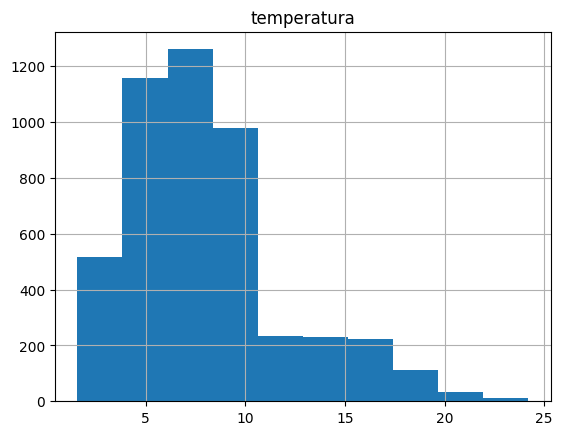

"\nthe histogram shows the temperature are concentrated between closed 5 and 10 degress. That's \nthe most common temperature in the data. \n"

In [164]:
series.hist() #Histogram
plt.show() #Show histogram
"""
the histogram shows the temperature are concentrated between closed 5 and 10 degress. That's 
the most common temperature in the data. 
"""

### 1.9
- Muestre el gráfico de densidad de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


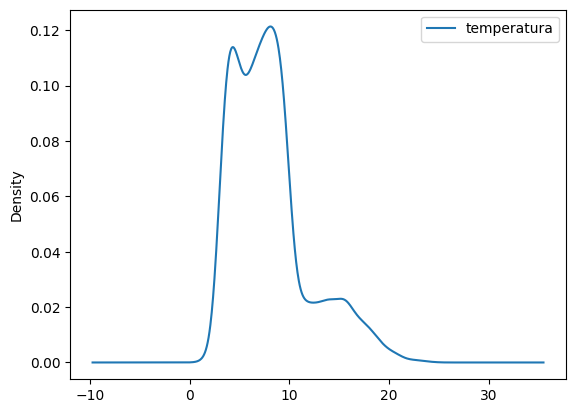

'\nThere are two peaks in the distribution, thats means that the data is bimodal because\nhave two modes.\n'

In [165]:
series.plot(kind='kde')
plt.show()
"""
There are two peaks in the distribution, thats means that the data is bimodal because
have two modes.
"""

### 1.10
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año. 
1. ¿Cómo se interpreta un gráfico Boxplot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

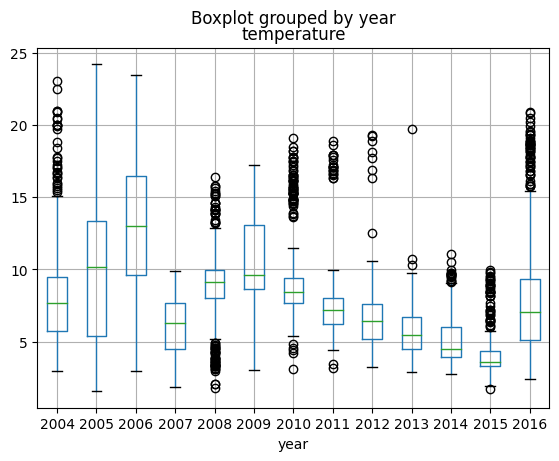

'\n1. The boxplot helps to identify the outliers and how they are distributed.\n2. We have a couple of conclusions here.\n    First, its looks like little decline in the temperature from 2009 to 2015.\n    second, in 2013 we have a strange outlier that is very far from the rest of the data.\n    and third we have a little increase in temperatures between 2005 and 2006. \n    Those two years has diverse temperatures.\n'

In [166]:

dataframe['year'] = [ datetime.strptime(series.index[i],"%d/%m/%Y").year for i in range(len(series))] #Assing month to dataframe
dataframe['temperature'] = [series['temperatura'].iloc[i] for i in range(len(series))]  #Assing temperature to new dataframe
dataframe.boxplot(column='temperature', by='year') #Create a boxplot
plt.show() #Show plot
"""
1. The boxplot helps to identify the outliers and how they are distributed.
2. We have a couple of conclusions here.
    First, its looks like little decline in the temperature from 2009 to 2015.
    second, in 2013 we have a strange outlier that is very far from the rest of the data.
    and third we have a little increase in temperatures between 2005 and 2006. 
    Those two years has diverse temperatures.
"""

### 1.11
- Agrupe los datos de la variable serie de manera Anual, y muestre el Heat Map por año. 
1. ¿Cómo se interpreta un gráfico Heat Map?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


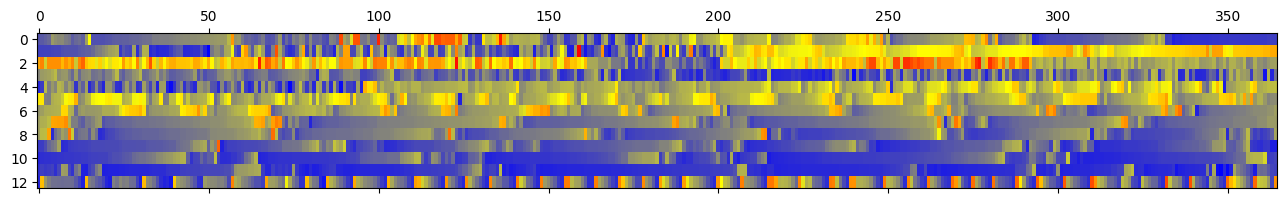

'\n1. The rows are the years and the columns are the days of each year. \nThe darkness color means the temperature is lower. Otherwise, the lighter color shows the highest temperatures. \n2.  The first years are warmest than last years. We saw this in another figures before.\n    The third year is the warmest year.\n    2015 had the homogeneous and coldest temperatures. \n'

In [167]:
#---Function definition---
from matplotlib.colors import LinearSegmentedColormap

def parser(x):
    return datetime.strptime(x, '%d/%m/%Y').year #Function to parse the date
#---Variables definition---
dataframe = pd.DataFrame() #New dataframe to make another table with other columns
years = pd.DataFrame() #To save the years grouped
#---Main code---
#This copy de series to a new dataframe
dataframe['year'] = [ parser(series.index[i]) for i in range(len(series))] #Assing month to dataframe
dataframe['temperature'] = [series['temperatura'].iloc[i] for i in range(len(series))]  #Assing temperature to new dataframe
#Group for year data 
dataframe['year'] = pd.to_datetime(dataframe['year'], format='%Y') #Convert to datetime year column¡Important!
groups= dataframe.groupby(pd.Grouper(key="year",freq="A"))#Group for year data and get mean

for name,group in groups:
    values = group['temperature'].values[:365]  #Read off leap years values to avoid errors
    years[name.year] = values
years = years.T #Transpose the data

# Create a custom colormap with red, green, and blue segments
colors = [(0, 0, 1),(1, 1, 0), (1, 0, 0) ]  # Red, Green, Blue
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)


plt.matshow(years, cmap=custom_cmap,interpolation=None, aspect='auto') #Create a matshow
plt.show() #Show plot
"""
1. The rows are the years and the columns are the days of each year. 
The darkness color means the temperature is lower. Otherwise, the lighter color shows the highest temperatures. 
2.  The first years are warmest than last years. We saw this in another figures before.
    The third year is the warmest year.
    2015 had the homogeneous and coldest temperatures. 
"""

### 1.12
- Muestre el Lag Scatter plot de la variable series. 
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


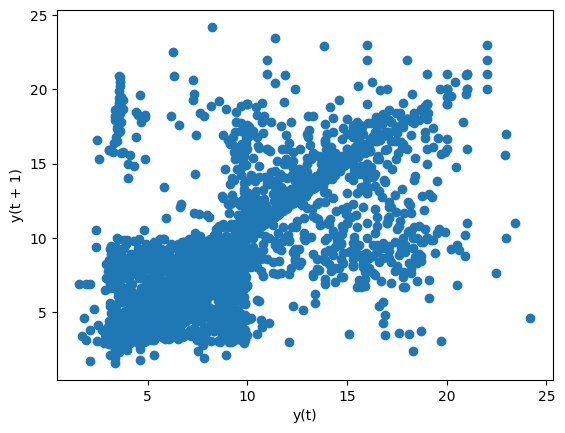

'\n1. The lag Scatter plot shows the correlation between each observation and the previous one.\n    If the points cluster along a diagonal line from the bottom-left to the top-right of the plot,\n    it suggests a positive correlation relationship. Otherwise, it suggests a negative correlation relationship.\n    More points tighter the relationship in to the diagonal line suggests a stronger relationship and more spread suggests \n    a weaker relationship.\n2.  The lag plot shows a positive correlation relationship.\n    Also we can see the points are more concentrated in the diagonal line, so the relationship is stronger.\n'

In [168]:
pd.plotting.lag_plot(series) #Create a lag plot
plt.show() #Show plot
"""
1. The lag Scatter plot shows the correlation between each observation and the previous one.
    If the points cluster along a diagonal line from the bottom-left to the top-right of the plot,
    it suggests a positive correlation relationship. Otherwise, it suggests a negative correlation relationship.
    More points tighter the relationship in to the diagonal line suggests a stronger relationship and more spread suggests 
    a weaker relationship.
2.  The lag plot shows a positive correlation relationship.
    Also we can see the points are more concentrated in the diagonal line, so the relationship is stronger.
"""

### 1.13
- Muestre el gráfico Autocorrelación de la variable series. 
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


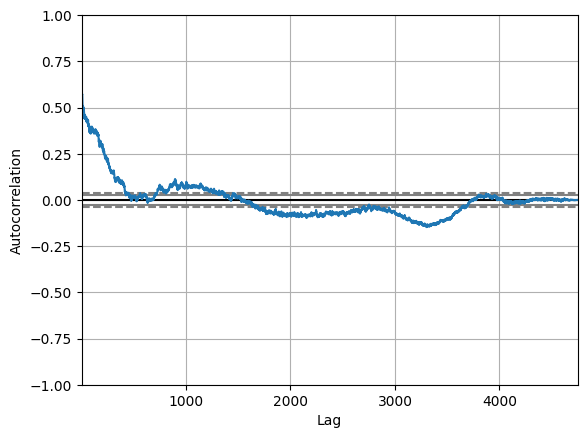

'\n1. A correlation value calculated between two numbers, results in a number between -1 and 1.\n    The sign of this number indicates a positive or negative correlation respectively.\n    A value close to zero suggests a weak correlation.\n    \n2. We see a value close to zero in the autocorrelation plot, so we can say the correlation is weak.\n   The waves suggest a litle seasonal component in data because sometimes is above and sometimes under the dotted lines.\n\n'

In [169]:
pd.plotting.autocorrelation_plot(series) #Create a autocorrelation plot
plt.show() #Show plot
"""
1. A correlation value calculated between two numbers, results in a number between -1 and 1.
    The sign of this number indicates a positive or negative correlation respectively.
    A value close to zero suggests a weak correlation.
    
2. We see a value close to zero in the autocorrelation plot, so we can say the correlation is weak.
   The waves suggest a litle seasonal component in data because sometimes is above and sometimes under the dotted lines.

"""

# Parte 2.  Diferenciación  (15 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie el capítulo 15. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'TS_d_2.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 2.1
- Cargue el archivo proporcionado y muestre los 10 primeros registros.

In [170]:
df = pd.read_csv('TS_d_2.csv',
                     header=0 , #Specify the header information at row 0
                     parse_dates=[0],  #In first column contains dates that need to be parsed
                     index_col=0) #Index information for the time
print(df.head(10)) #For default shows first five rows
print(type(df)) #Shows series type

            humedad
fecha              
2000-01-01     0.89
2000-01-02     0.86
2000-01-03     0.89
2000-01-04     0.83
2000-01-05     0.83
2000-01-06     0.85
2000-01-07     0.95
2000-01-08     0.89
2000-01-09     0.82
2000-01-10     0.72
<class 'pandas.core.frame.DataFrame'>


### 2.2

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

In [171]:
series = df['humedad'] #Get the humidity column

X = series.values #Get the values of the series

result = adfuller(X) #Apply the adfuller test

print('ADF Statistic: %f' % result[0]) #
print('p-value: %f' % result[1])
print('Critical Values:')    
for key, value in result[4].items(): #Show the critical values
    print('\t%s: %.3f' % (key, value))

"""
p-value returned is lower than 0.05, so we can reject the null hypothesis. The data does not have a unit root
and is stationary. ADF Statistic is negative and is much lower than critical values, so this suggest that we
can reject the null hypothesis.
"""

ADF Statistic: -6.069992
p-value: 0.000000
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


'\np-value returned is lower than 0.05, so we can reject the null hypothesis. The data does not have a unit root\nand is stationary. ADF Statistic is negative and is much lower than critical values, so this suggest that we\ncan reject the null hypothesis.\n'

### 2.3

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

In [172]:
diferenciacion = series.diff().dropna() #Apply the differenciation to the series

X = diferenciacion #Get the values of the series

result = adfuller(X) #Apply the adfuller test

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')    
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) #Show the critical values

"""
ADF Statistic decreased from -6.069992 to -6.981581. This happens because differencing series is used to
make temporal series more stationary. 
"""

ADF Statistic: -6.981581
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


'\nADF Statistic decreased from -6.069992 to -6.981581. This happens because differencing series is used to\nmake temporal series more stationary. \n'

### 2.4

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué sé mira así relacionado con la necesidad o no de diferenciación?

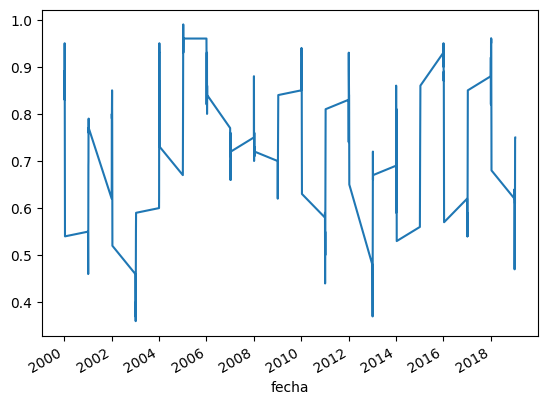

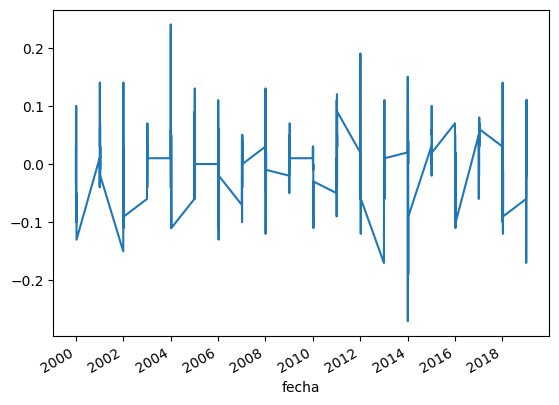

"\nIt didn't required any differencing. It looks very similar because the time series already was stationary. The data\ndoesn't follows any linear trend. Changes on the mean are oscillating in a constant value.\n"

In [173]:
series.plot() #Plot the series
plt.show() #Show plot

diferenciacion.plot()   #Plot the differenciation
plt.show() #Show plot

"""
It didn't required any differencing. It looks very similar because the time series already was stationary. The data
doesn't follows any linear trend. Changes on the mean are oscillating in a constant value.
"""

### 2.5

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué cree que sé mira así?

In [174]:
"""
It didn't required any differencing. It looks that way because is trying to make the data more stationary
by removing the linear trend. Reducing linear trend was successful, that is evident when looking at the
differencing graph, where a lot of data is around 0.
"""

"\nIt didn't required any differencing. It looks that way because is trying to make the data more stationary\nby removing the linear trend. Reducing linear trend was successful, that is evident when looking at the\ndifferencing graph, where a lot of data is around 0.\n"

# Parte 3.  ARIMA  (20 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Cap_24. Estudie su contenido. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'TS_d_3.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 3.1

- Explique en qué consiste ARIMA.

In [175]:
"""
ARIMA is a class of model that captures a suite of different standard temporal structures in time series data.
Its acronym stands for: Autoregressive Integrated Moving Average. Also, is a popular and widely used
statistical method for forecasting time series data.
"""

'\nARIMA is a class of model that captures a suite of different standard temporal structures in time series data.\nIts acronym stands for: Autoregressive Integrated Moving Average. Also, is a popular and widely used\nstatistical method for forecasting time series data.\n'

### 3.2

- Cargue el archivo y use los gráficos que considere prudente para ver cómo se comportan los datos
- Comente sus conclusiones

           temperatura
fecha                 
1/1/2004           5.3
2/1/2004           5.6
3/1/2004           5.9
4/1/2004           6.2
5/1/2004           8.4
6/1/2004           7.9
7/1/2004           7.6
8/1/2004           7.7
9/1/2004           7.1
10/1/2004          6.8
<class 'pandas.core.series.Series'>


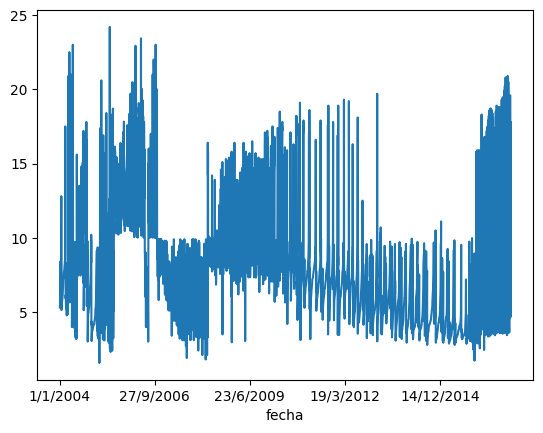

In [176]:
df = pd.read_csv('TS_d_3.csv',
                     header=0 , #Specify the header information at row 0
                     parse_dates=[0],  #In first column contains dates that need to be parsed
                     index_col=0) #Index information for the time
print(df.head(10)) #For default shows first five rows
print(type(series)) #Shows series type

series = df['temperatura'] #Get the temperature column

series.plot() #Plot the series
plt.show() #Show plot

### 3.3

- Analice si requiere hacer diferenciación o no. Explique

In [177]:
"""
Is not necesary to do any differencing because the data is already stationary. The data doesn't follows any linear trend.
The behavior can be seen in the graph, where the data is oscillating around a constant value.
"""

"\nIs not necesary to do any differencing because the data is already stationary. The data doesn't follows any linear trend.\nThe behavior can be seen in the graph, where the data is oscillating around a constant value.\n"

### 3.4

- Haga forecast (similar a las últimas secciones de ese capítulo), con un train de 80% y un test de 20% (no olvide que son series temporales, no datos i.i.d.)

In [178]:
X = series.values
size = int(len(X) * 0.80) #80% of the data is used for training
train, test = X[0:size], X[size:len(X)] #Split data into training and test sets
history = [x for x in train] #Create a list with training data
predictions = list() #Create a list for predictions

for obs in test:
    model = ARIMA(history, order=(5,1,0)) #Create a model with ARIMA of order (5,1,0)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0] #Get the prediction
    predictions.append(yhat)
    history.append(obs)
    print(f"predicted={yhat}, expected={obs}")

rmse = sqrt(mean_squared_error(test, predictions))
print(f"Test RMSE: {rmse}")

predicted=3.8564749269844176, expected=3.91
predicted=3.8775169102143248, expected=3.91
predicted=3.888972464207067, expected=3.92
predicted=3.90240708553484, expected=3.92
predicted=3.9109251228625914, expected=3.94
predicted=3.9260100967236435, expected=3.97
predicted=3.946800468953688, expected=4.06
predicted=3.999540775358392, expected=4.06
predicted=4.01677104077116, expected=4.08
predicted=4.038896139161084, expected=4.11
predicted=4.071420521768671, expected=4.17
predicted=4.1179756163682235, expected=4.24
predicted=4.173401198953055, expected=4.28
predicted=4.212933163924708, expected=4.36
predicted=4.275649873888192, expected=4.43
predicted=4.340840300632511, expected=4.44
predicted=4.37646832284224, expected=4.59
predicted=4.478245415282457, expected=4.64
predicted=4.542732439985545, expected=4.72
predicted=4.615066945981162, expected=4.92
predicted=4.755807230147688, expected=4.93
predicted=4.813051182646286, expected=5.02
predicted=4.900474821426581, expected=5.29
predicted

### 3.5

- Grafique el predicho versus el real y comente sus conclusiones.

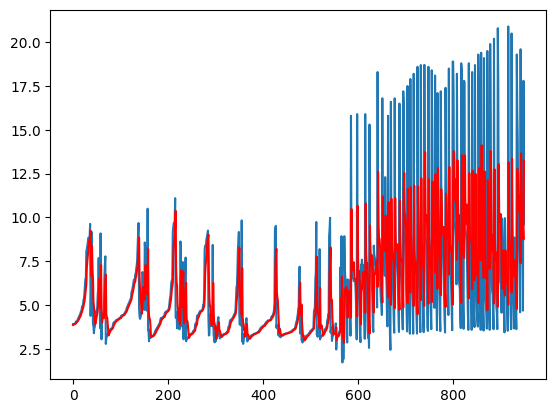

'\nAs you can see in the graph below, the red lines are the predicted values and the blue lines are the real values.\nThe predicted values are close to the real values, so the model is accurate. The RMSE is 3.237955553748622. \nAlso, in the graph, none of the predicted values seems to be outside of what the real values are, so it also is\na factor that indicates that the model is accurate. Another factor can be seen on the curve almost at the\nend of the graph, where the predicted values stucked to the real values.\n'

In [179]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

"""
As you can see in the graph below, the red lines are the predicted values and the blue lines are the real values.
The predicted values are close to the real values, so the model is accurate. The RMSE is 3.237955553748622. 
Also, in the graph, none of the predicted values seems to be outside of what the real values are, so it also is
a factor that indicates that the model is accurate. Another factor can be seen on the curve almost at the
end of the graph, where the predicted values stucked to the real values.
"""